<a href="https://colab.research.google.com/github/jscienciadados/features-engineering/blob/main/Feature_Engineering_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Features Engineering with variable categorical

## Analisando Dados Bancários de Vários Usuários
dataset: http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

## Carregando os Dados

In [1]:
bank <- read.table("bank/bank-full.csv", header = TRUE, sep = ";")

In [3]:
View(bank)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no


Criando uma nova coluna

In [5]:
# coluna -> que mostra o trabalho de cada pessoa nesse conjunto de dados
# table -> quantifica as quantidades de uma coluna
table(bank$job)


       admin.   blue-collar  entrepreneur     housemaid    management 
         5171          9732          1487          1240          9458 
      retired self-employed      services       student    technician 
         2264          1579          4154           938          7597 
   unemployed       unknown 
         1303           288 

In [10]:
install.packages("dplyr", dependencies = T)
#install.packages("ggplot2", dependencies = T)
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
install.packages('ggplot2', repos='http://cran.us.r-project.org')
#install.packages("ggplot2")

#library(ggploto2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [16]:
library(ggplot2)

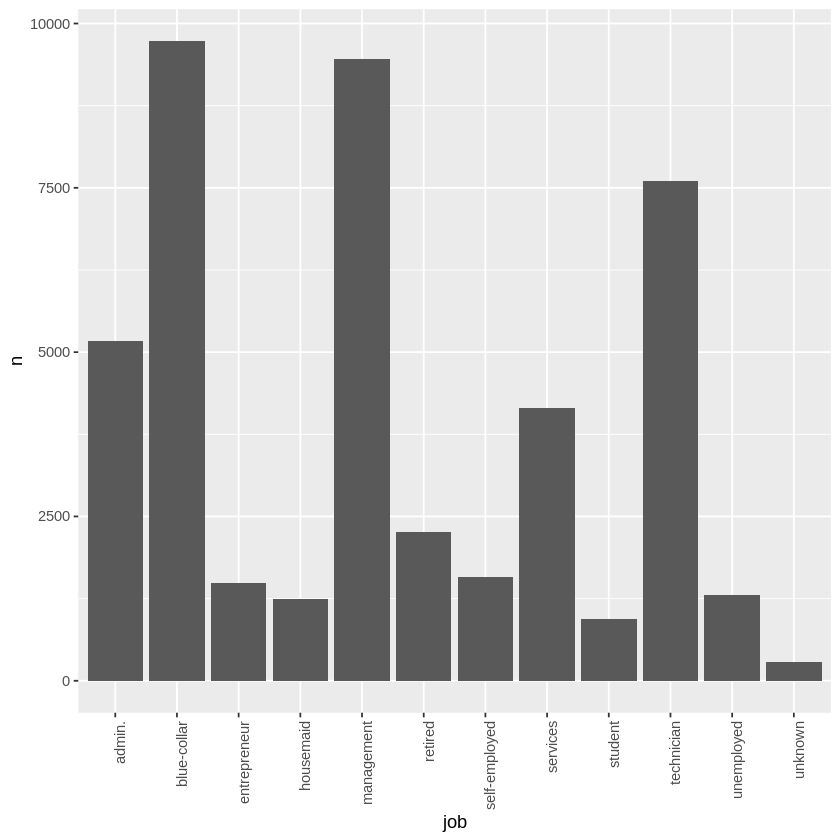

In [18]:
bank %>%
  group_by(job) %>%
  summarise(n = n()) %>%
  ggplot(aes(x = job, y = n)) +
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [19]:
# Usando a função mutate do pacote dplyr para criar uma nova coluna no datset

In [23]:
table(bank$job)


       admin.   blue-collar  entrepreneur     housemaid    management 
         5171          9732          1487          1240          9458 
      retired self-employed      services       student    technician 
         2264          1579          4154           938          7597 
   unemployed       unknown 
         1303           288 

In [24]:
bank <- bank %>%
  mutate(tecchnology_use =
          case_when(job == 'admin' ~ "medio",
                    job == 'blue-collar' ~ "baixo",
                    job == 'entrepreneur' ~ "alto",
                    job == 'housemaid' ~ "baixo",
                    job == 'management' ~ "medio",
                    job == 'retired' ~ "baixo",
                    job == 'self-employed' ~ "baixo",
                    job == 'services' ~ "medio",
                    job == 'student' ~ "alto",
                    job == 'technician' ~ "alto",
                    job == 'unemployed' ~ "baixo",
                    job == 'unknown' ~ "baixo"))

In [25]:
head(bank)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,tecchnology_use
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,medio
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,alto
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,alto
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,baixo
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,baixo
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,medio


In [26]:
# verificando as quantidade desse novo campo
round(prop.table(table(bank$tecchnology_use)),2)


 alto baixo medio 
 0.25  0.41  0.34 

## Variáveis Dummies

In [27]:
bank <- bank %>%
  mutate(defaulted = ifelse(default == "yes", 1, 0))

In [29]:
head(bank$defaulted)

[1] 0 0 0 0 0 0

## One Hot Encoding

In [30]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [31]:
dmy <- dummyVars(" ~ .", data = bank)

In [32]:
bank.dummies <- data.frame(predict(dmy, newdata = bank))

In [33]:
View(bank.dummies)

,age,jobadmin.,jobblue.collar,jobentrepreneur,jobhousemaid,jobmanagement,jobretired,jobself.employed,jobservices,jobstudent,⋯,poutcomefailure,poutcomeother,poutcomesuccess,poutcomeunknown,yno,yyes,tecchnology_usealto,tecchnology_usebaixo,tecchnology_usemedio,defaulted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,58,0,0,0,0,1,0,0,0,0,⋯,0,0,0,1,1,0,0,0,1,0
2,44,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,1,0,1,0,0,0
3,33,0,0,1,0,0,0,0,0,0,⋯,0,0,0,1,1,0,1,0,0,0
4,47,0,1,0,0,0,0,0,0,0,⋯,0,0,0,1,1,0,0,1,0,0
5,33,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,1,0,0,1,0,0
6,35,0,0,0,0,1,0,0,0,0,⋯,0,0,0,1,1,0,0,0,1,0
7,28,0,0,0,0,1,0,0,0,0,⋯,0,0,0,1,1,0,0,0,1,0
8,42,0,0,1,0,0,0,0,0,0,⋯,0,0,0,1,1,0,1,0,0,1
9,58,0,0,0,0,0,1,0,0,0,⋯,0,0,0,1,1,0,0,1,0,0


In [34]:
View(bank)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,tecchnology_use,defaulted
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,medio,0
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,alto,0
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,alto,0
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,baixo,0
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,baixo,0
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,medio,0
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,medio,0
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,alto,1
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,baixo,0


In [35]:
str(bank.dummies)

'data.frame':	45211 obs. of  57 variables:
 $ age                 : num  58 44 33 47 33 35 28 42 58 43 ...
 $ jobadmin.           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ jobblue.collar      : num  0 0 0 1 0 0 0 0 0 0 ...
 $ jobentrepreneur     : num  0 0 1 0 0 0 0 1 0 0 ...
 $ jobhousemaid        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ jobmanagement       : num  1 0 0 0 0 1 1 0 0 0 ...
 $ jobretired          : num  0 0 0 0 0 0 0 0 1 0 ...
 $ jobself.employed    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ jobservices         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ jobstudent          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ jobtechnician       : num  0 1 0 0 0 0 0 0 0 1 ...
 $ jobunemployed       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ jobunknown          : num  0 0 0 0 1 0 0 0 0 0 ...
 $ maritaldivorced     : num  0 0 0 0 0 0 0 1 0 0 ...
 $ maritalmarried      : num  1 0 1 1 0 1 0 0 1 0 ...
 $ maritalsingle       : num  0 1 0 0 1 0 1 0 0 1 ...
 $ educationprimary    : num  0 0 0 0 0 0 0 0 1 0 ...
 $ educationsecondary  : num 

In [36]:
dim(bank.dummies)

[1] 45211    57

In [37]:
dim(bank)

[1] 45211    19

## Combinando Recursos ou Cruzamento de Recursos

In [38]:
bank %>%
  group_by(job, marital) %>%
  summarise(n = n())

`summarise()` has grouped output by 'job'. You can override using the `.groups` argument.



job,marital,n
<chr>,<chr>,<int>
admin.,divorced,750
admin.,married,2693
admin.,single,1728
blue-collar,divorced,750
blue-collar,married,6968
blue-collar,single,2014
entrepreneur,divorced,179
entrepreneur,married,1070
entrepreneur,single,238


Visualizando

`summarise()` has grouped output by 'job'. You can override using the `.groups` argument.



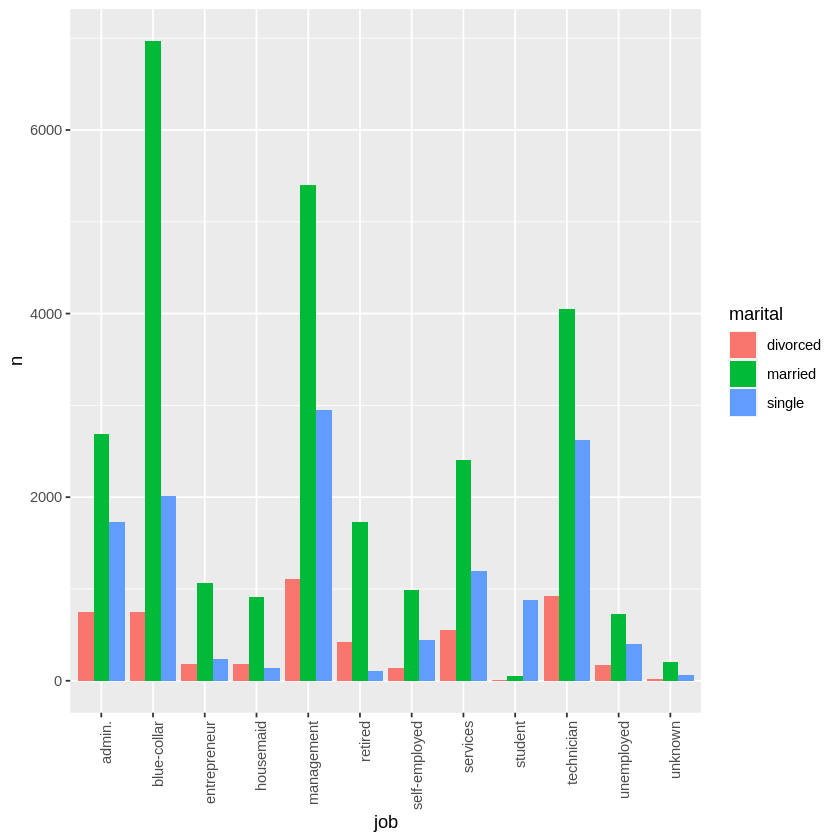

In [42]:
bank %>%
  group_by(job, marital) %>%
  summarise(n = n()) %>%
  ggplot(aes(x = job, y = n, fill = marital)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [45]:
# Interpretando de forma mais compreensíve
dmi <- dummyVars(~ job:marital, data = bank)
bank.cross <- predict(dmi, newdata = bank)
head(bank.cross)

,jobadmin.:maritaldivorced,jobblue-collar:maritaldivorced,jobentrepreneur:maritaldivorced,jobhousemaid:maritaldivorced,jobmanagement:maritaldivorced,jobretired:maritaldivorced,jobself-employed:maritaldivorced,jobservices:maritaldivorced,jobstudent:maritaldivorced,jobtechnician:maritaldivorced,⋯,jobentrepreneur:maritalsingle,jobhousemaid:maritalsingle,jobmanagement:maritalsingle,jobretired:maritalsingle,jobself-employed:maritalsingle,jobservices:maritalsingle,jobstudent:maritalsingle,jobtechnician:maritalsingle,jobunemployed:maritalsingle,jobunknown:maritalsingle
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [46]:
# Salvando o dataset
write.csv(bank, "banco.csv")